In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [4]:
df = pd.read_csv('drawndata1.csv')

In [5]:
X = df[['x', 'y']].values # convert to a numpy array
y = df['z'] == 'a'

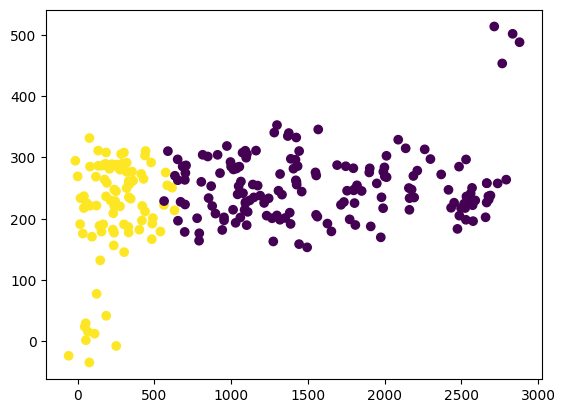

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y)

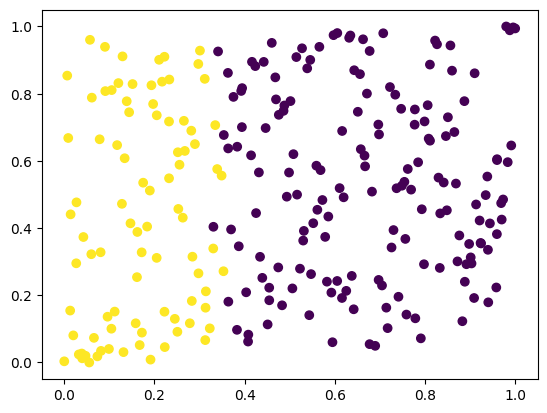

In [7]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

In [8]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

Comparing StandardScaler and QuantileTransformer

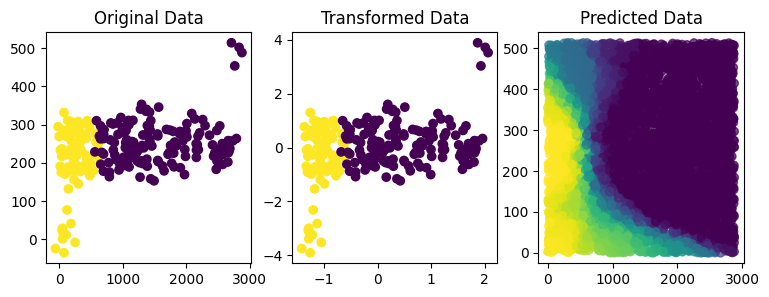

In [9]:
plot_output(StandardScaler())

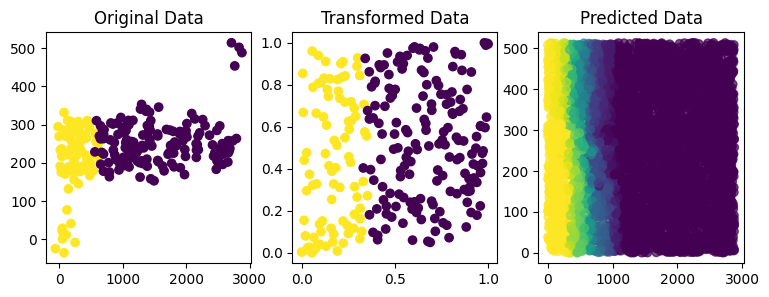

In [10]:
plot_output(QuantileTransformer(n_quantiles=100))

Another Data Set

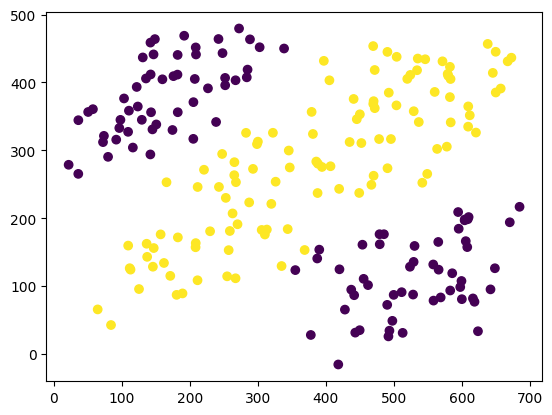

In [11]:
df = pd.read_csv('drawndata2.csv')
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter()

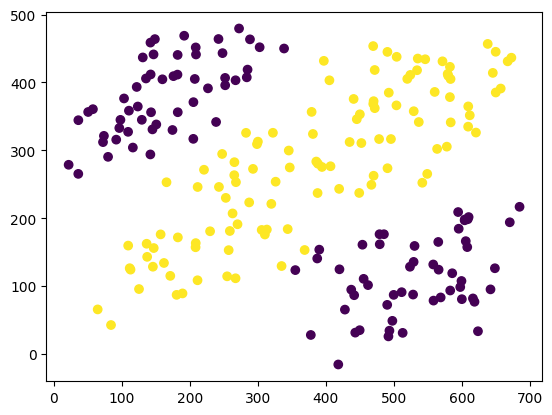

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scale', PolynomialFeatures()),
    ('model', LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)